<a href="https://colab.research.google.com/github/mansipatel2508/Image-Forgery-Detection-CNN-vs-Transfer-Learning-Comparison/blob/master/Image_Forgery_Detection_CNN_vs_Transfer_Learning_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Forgery Detection CNN vs Transfer Learning Comparison
# Problem Statement
In the field of Digital Forensics, it is important to know the authenticity or originality of an image, this project focuses on predicting the given image is pristine or fake/manipulated/edited/photoshoped.

Image Preprocessing | Image Handling | Data visualization | Feature extraction & engineering | Transfer Learning | Deep CNN | Binary Classification | Model Evaluation & Comparison | Conclusion & Future scope | OpenCV

The project definition and dataset is the part of first IEEE Image Forensics challange launched in 2013 and to observe the experimental result of deep CNN network vs Transfer Learning which used VGG16 as trained model.

The challange has 2 phases, dealing with the first phase in this project to detect if its real or fake image, binary classification problem.

The project learnings
* Image Handling and Processing
* Using Image data generator
* Observering the performaces CNN vs Transfer Learning
* Feature engineering.extraction on images
* Otsu’s thresholding on images
* Converting greyscale images to binary
* Image normalization

Libraries Exposure
* OpenCV : cv2
* Image Data Generator
* Pylab : rcParams
* imageio : imread
* pickle

# Dataset
* Dataset has 2 folders containing 658 fake images and 779 pristine images
* Used the train dataset which arounf 2 GB and splited train-test from that (Processor Contraint)
* Online:  http://ifc.recod.ic.unicamp.br/fc.website/index.py?sec=0


#Understanding the data

* Pristine Images : 779

* Fake Images : 658




In [1]:
import os

fake_path = "dataset/training/fake"
real_path = "dataset/training/real"

fakeimage = os.listdir(fake_path)
pristineimage = os.listdir(real_path)

In [2]:
print("fake images",len(fakeimage))
print("pristine images",len(pristineimage))

fake images 658
pristine images 779


In [3]:
fakeimage[0:10]

['easy_100_1111.jpg',
 'easy_101_0010.jpg',
 'easy_102_0101.jpg',
 'easy_103_1111.jpg',
 'easy_104_1000.jpg',
 'easy_105_1100.jpg',
 'easy_106_0011.jpg',
 'easy_107_1011.jpg',
 'easy_108_1111.jpg',
 'easy_109_1111.jpg']

In [4]:
pristineimage[0:10]

['real_00001.jpg',
 'real_00002.jpg',
 'real_00003.jpg',
 'real_00004.jpg',
 'real_00005.jpg',
 'real_00006.jpg',
 'real_00007.jpg',
 'real_00008.jpg',
 'real_00009.jpg',
 'real_00010.jpg']

## Plotting the Depth of the Images
* The images with various channel/depth
* Need to convert all the images to the one majority image channel or remove those.


To do this first we have see the channels in our dataset.

That only tells us total counts, not channel distribution.

We still need to check:

* How many are grayscale

* How many are RGB

* How many are RGBA



So first we have to get real numbers from our dataset.
Output: 

## Plotting the Depth of the Images
* The images with various channel/depth
* Need to convert all the images to the one majority image channel or remove those.


To do this first we have see the channels in our dataset.

That only tells us total counts, not channel distribution.

We still need to check:

* How many are grayscale

* How many are RGB

* How many are RGBA



So first we have to get real numbers from our dataset.
Output: 
* Pristine image channel distribution: Counter({3: 779})
* Fake image channel distribution: Counter({3: 658})

Which means in our dataset all the images are 3-channel images (RGB) so we have got the output as 3: 779 which means 3 which is rgb images so the values for: 
grayscale and RGBA we have kept it as 0. As there is no such images. 

In [6]:
import os
from PIL import Image
from collections import Counter

def count_channels(folder):
    counter = Counter()
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            with Image.open(img_path) as img:
                depth = len(img.getbands())
                counter[depth] += 1
        except:
            pass
    return counter

real_counts = count_channels(r"C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\training\real")
fake_counts = count_channels(r"C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\training\fake")

print("Pristine image channel distribution:", real_counts)
print("Fake image channel distribution:", fake_counts)

Pristine image channel distribution: Counter({3: 779})
Fake image channel distribution: Counter({3: 658})


In [7]:
pristine1 = 0 #Since there is no grayscale image in teh dataset for future ref we are taking if the dataset gets changed. We can simply modify these vales. 
pristine2 = 779 # We have 779 images in RGB channel hence we are taking all here. 
pristine3 = 0 #Again no RGBA type of images. 

fake1 = 0
fake2 = 658
fake3 = 0

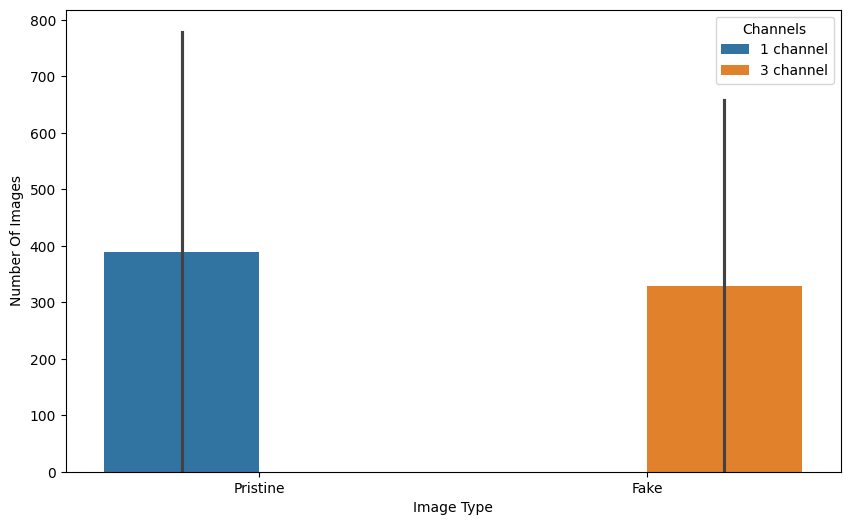

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import seaborn as sns
x = ['Pristine',
     'Fake']

y = [pristine3,0]
z=[pristine2,fake2]
k=[pristine1,fake1]
df = pd.DataFrame(zip(x*3, ["1 channel"]*3+["3 channel"]*3+["4 channel"]*3, y+z+k), columns=["Image Type", "Channels", "Number Of Images"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Image Type", hue="Channels", y="Number Of Images", data=df)
plt.show()

## Shape conflict
* Fake and mask of the fake images were in different shape 
* Reshape the mask as fake

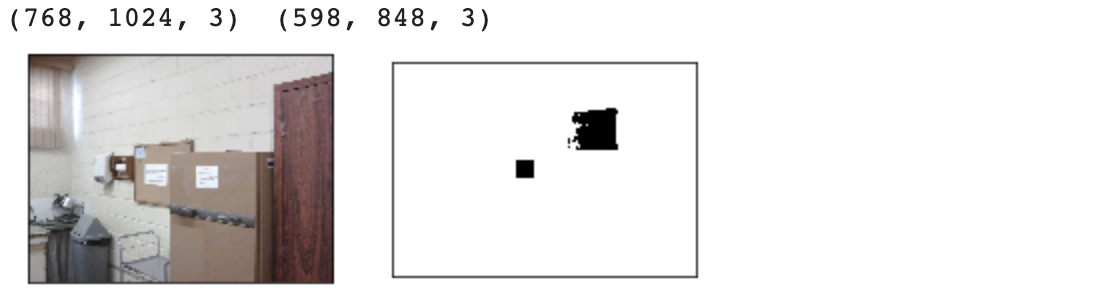

In [13]:
from IPython.display import Image,display
display(Image(r'C:\Users\gaura\OneDrive\Documents\capstone\Sourcecode\Images\shapecon.png',width=1000, height=300))

# Data Sampling
* Fake images : 450
* Pristine images : 450

# Train -Test Split
* Train - Test : 70% - 30%
* Set ‘Stratify’ parameter to labels


# Model Evaluation

## Deep CNN

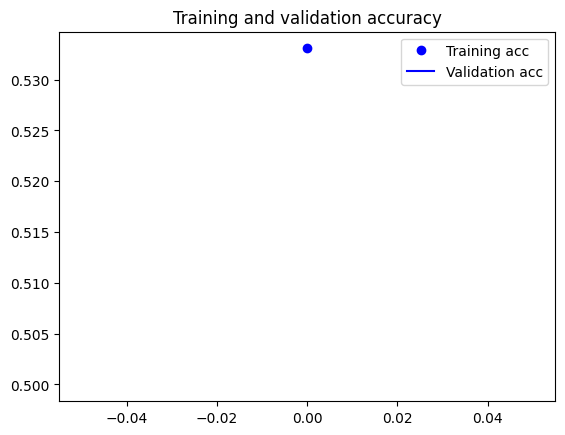

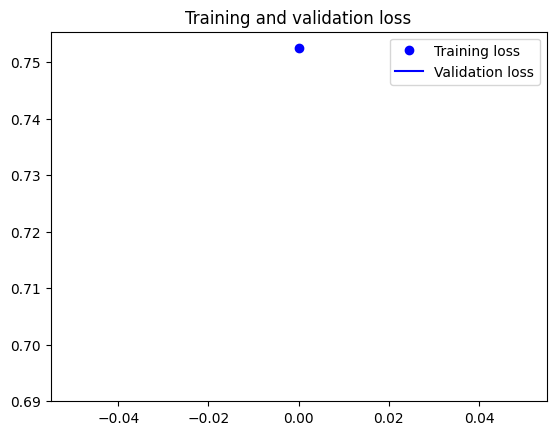

In [14]:
# import matplotlib.pyplot as plt
# from keras.models import load_model
# # history=load_model(image_path+ 'keras_cnn_model.keras')
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

import pickle
import matplotlib.pyplot as plt

with open("history.pkl", "rb") as f:
    history = pickle.load(f)

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
from tensorflow.keras.models import load_model

cnn_model = load_model("model_checkpoint.keras")

In [19]:
print(dir())

['Counter', 'Image', 'In', 'Out', '_', '_3', '_4', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'acc', 'cnn_model', 'count_channels', 'date2num', 'datetime', 'df', 'display', 'epochs', 'exit', 'f', 'fake1', 'fake2', 'fake3', 'fake_counts', 'fake_path', 'fakeimage', 'get_ipython', 'history', 'k', 'load_model', 'loss', 'open', 'os', 'pd', 'pickle', 'plt', 'pristine1', 'pristine2', 'pristine3', 'pristineimage', 'quit', 'real_counts', 'real_path', 'sns', 'sys', 'val_acc', 'val_loss', 'x', 'y', 'z']


# Recreate test_set

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test',     # adjust if needed
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 604 images belonging to 2 classes.


# Predictions

In [23]:
y_pred_prob = cnn_model.predict(test_set)
y_pred_cnn = (y_pred_prob > 0.5).astype("int32").flatten()

y_true = test_set.classes

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 512ms/step
Precision score: 0.25
Recall score: 0.5
F1 score: 0.3333333333333333
[[  0 302]
 [  0 302]]
Plot of Confusion Matrix


c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


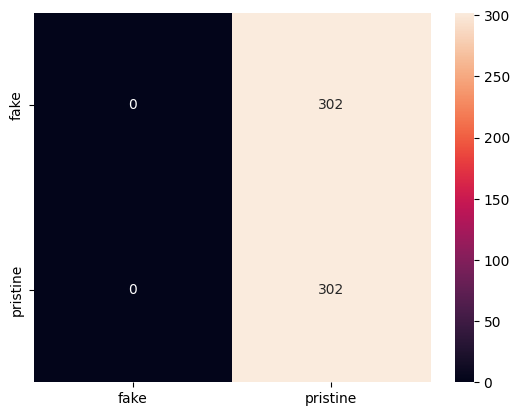

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.50      1.00      0.67       302

    accuracy                           0.50       604
   macro avg       0.25      0.50      0.33       604
weighted avg       0.25      0.50      0.33       604



c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [31]:
y_pred_prob = cnn_model.predict(test_set)
y_pred_cnn = (y_pred_prob > 0.5).astype("int32")
y_cv = test_set.classes   # ← ADD THIS ONE LINE

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()

# plot_confusion_matrix(cm,['fake','pristine'])  -> we were having an error 

""" 
Why this works
plot_confusion_matrix() is not a built-in function
sns.heatmap() is standard and clean
No need to define extra functions

"""

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['fake','pristine'], yticklabels=['fake','pristine'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

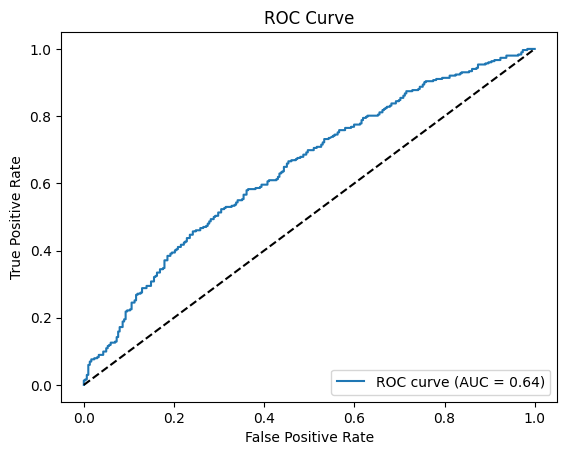

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_cv, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Transfer Learning
* VGG 16 (17 layers) + Top layer ( Flatten + Dense + Dense )

In [40]:
from tensorflow.keras.models import load_model

transfer_model = load_model("transfer_model.keras")

In [43]:
pred_transfer_prob = transfer_model.predict(test_set)
pred_transfer = (pred_transfer_prob > 0.5).astype("int32").flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 682ms/step


In [44]:
from sklearn import metrics
score_lr2 = metrics.f1_score(y_cv, pred_transfer, average= "weighted")
print("F1 score: {}".format(score_lr2))

F1 score: 0.6162611285757897


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 516ms/step
Precision score: 0.6191500238944643
Recall score: 0.6175496688741722
F1 score: 0.6162611285757897
[[204  98]
 [133 169]]
Plot of Confusion Matrix


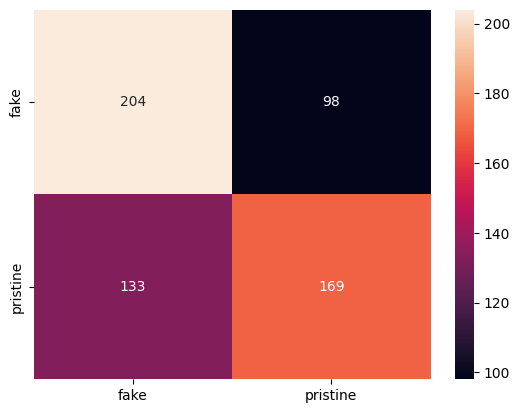

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       302
           1       0.63      0.56      0.59       302

    accuracy                           0.62       604
   macro avg       0.62      0.62      0.62       604
weighted avg       0.62      0.62      0.62       604



In [47]:
y_pred_prob = transfer_model.predict(test_set)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred, average= "weighted")
print("Recall score: {}".format(score))
score_lr2 = metrics.f1_score(y_cv, y_pred, average= "weighted")
print("F1 score: {}".format(score_lr2))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
# plot_confusion_matrix(cm,['fake','pristine'])   # with this once for your clarification
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['fake','pristine'], yticklabels=['fake','pristine'])
plt.show()
print(classification_report(y_cv,y_pred))

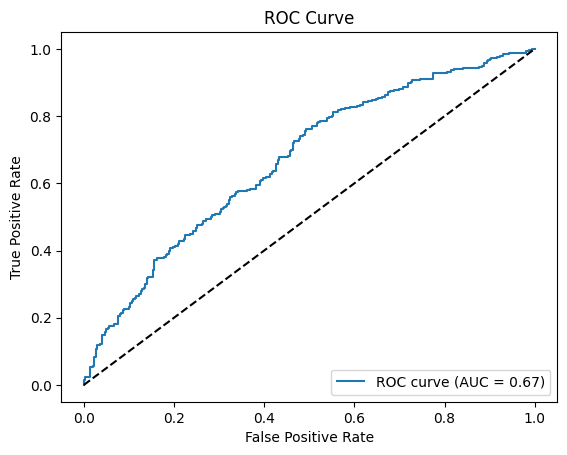

In [49]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_cv, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#Comparison

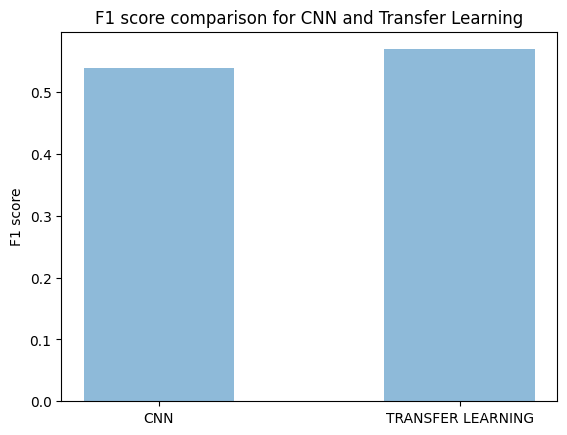

In [50]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('CNN', 'TRANSFER LEARNING')
y_pos = np.arange(len(objects))
performance = [0.5395,0.5692]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score comparison for CNN and Transfer Learning')
 
plt.show()

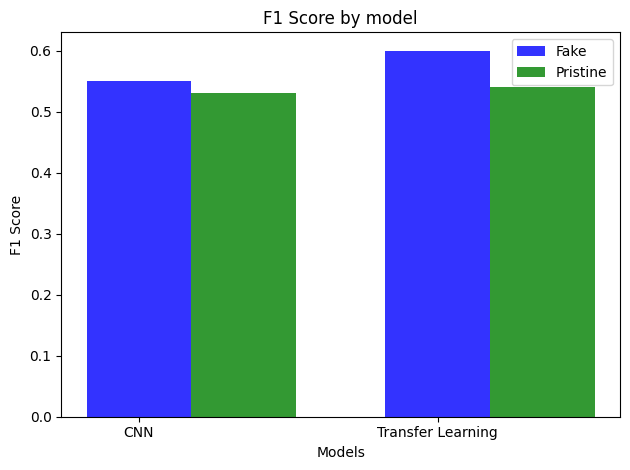

In [51]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.55,0.60 )
p = (0.53, 0.54)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Fake')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='Pristine')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score by model')
plt.xticks(index , ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

# Test 5 images
* Labels : 1 - pristine and 0 - fake


Image 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


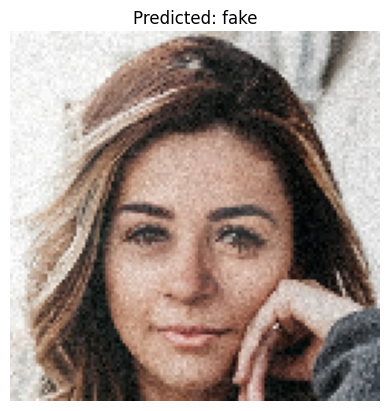

In [83]:
#Correct

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\fake\mid_180_1110.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

plt.imshow(img)
plt.axis("off")
label_name = "pristine" if pred_label == 1 else "fake"
plt.title(f"Predicted: {label_name}")
plt.show()

Image 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


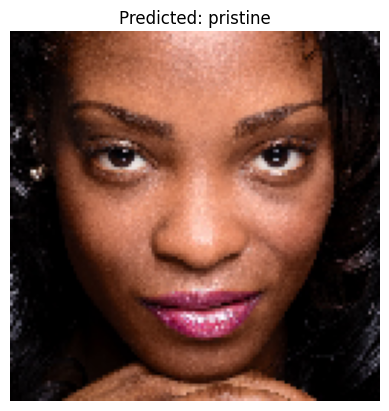

In [81]:
#Correct

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\real\real_00783.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

plt.imshow(img)
plt.axis("off")
label_name = "pristine" if pred_label == 1 else "fake"
plt.title(f"Predicted: {label_name}")
plt.show()

Image3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


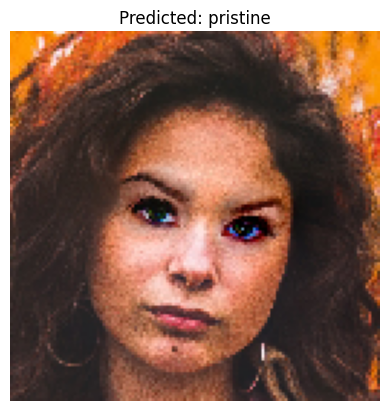

In [80]:
#Model fucked up here.

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\fake\mid_186_1100.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

plt.imshow(img)
plt.axis("off")
label_name = "pristine" if pred_label == 1 else "fake"
plt.title(f"Predicted: {label_name}")
plt.show()

Image 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


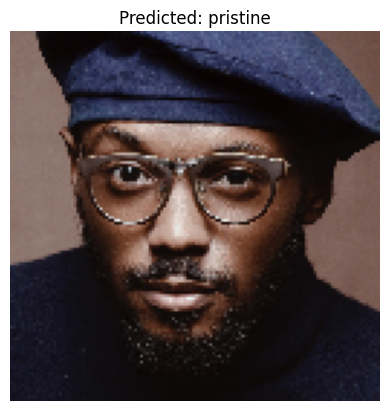

In [77]:
#Correct

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\real\real_00789.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

plt.imshow(img)
plt.axis("off")
label_name = "pristine" if pred_label == 1 else "fake"
plt.title(f"Predicted: {label_name}")
plt.show()

Image 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


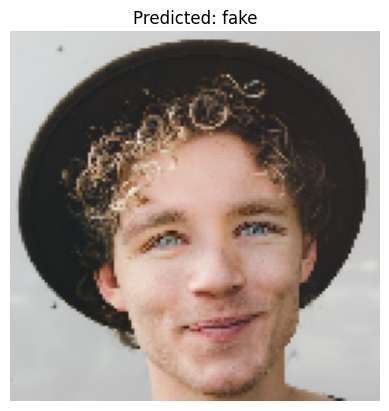

In [75]:
#Correct

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\fake\mid_196_1100.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

plt.imshow(img)
plt.axis("off")
label_name = "pristine" if pred_label == 1 else "fake"
plt.title(f"Predicted: {label_name}")
plt.show()

Here 5 of 4 prediction were right and 1 falied as we have kep the Epoch to 1 henc increasing it to 10 might sort things out. 

# Feature Extraction for Performance boost

* Sampled the fake image by using it’s mask values
>* Masks converted into binary so that the masks' boundary would be more prominent and distinctive
>* Sobel kernel concept was implemented to make samples from fake such that 60% in the image is non-edited while 40% is edited
* For pristine image randomly made samples

>* Sample size : 64 x 64 x 3

# Data Volume
* 50,000 fake samples
* 50,000 pristine samples

A fake sample example is as follows

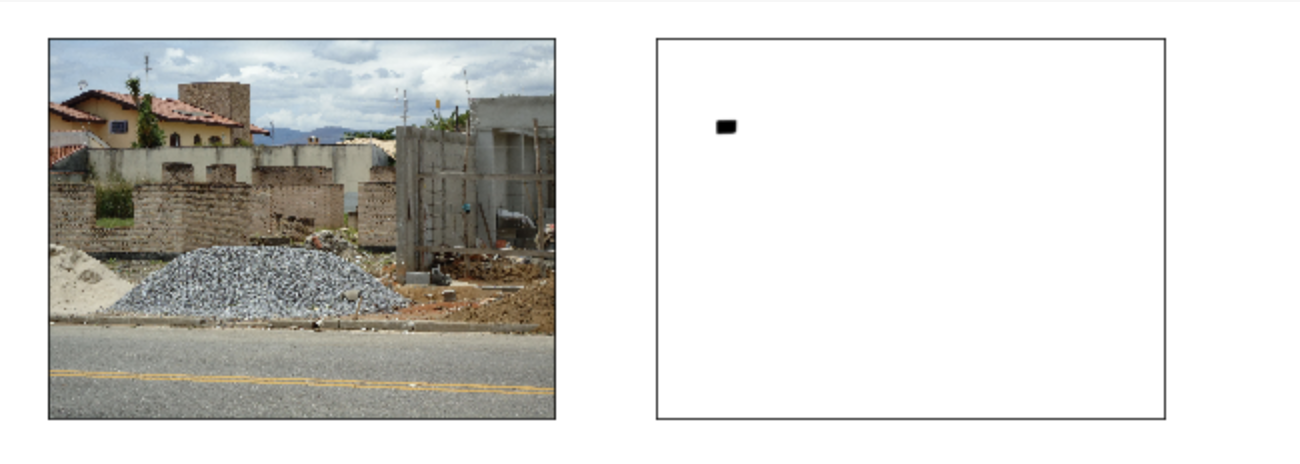

In [84]:
from IPython.display import Image,display
display(Image(r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\Images\f1.png',width=900, height=300))

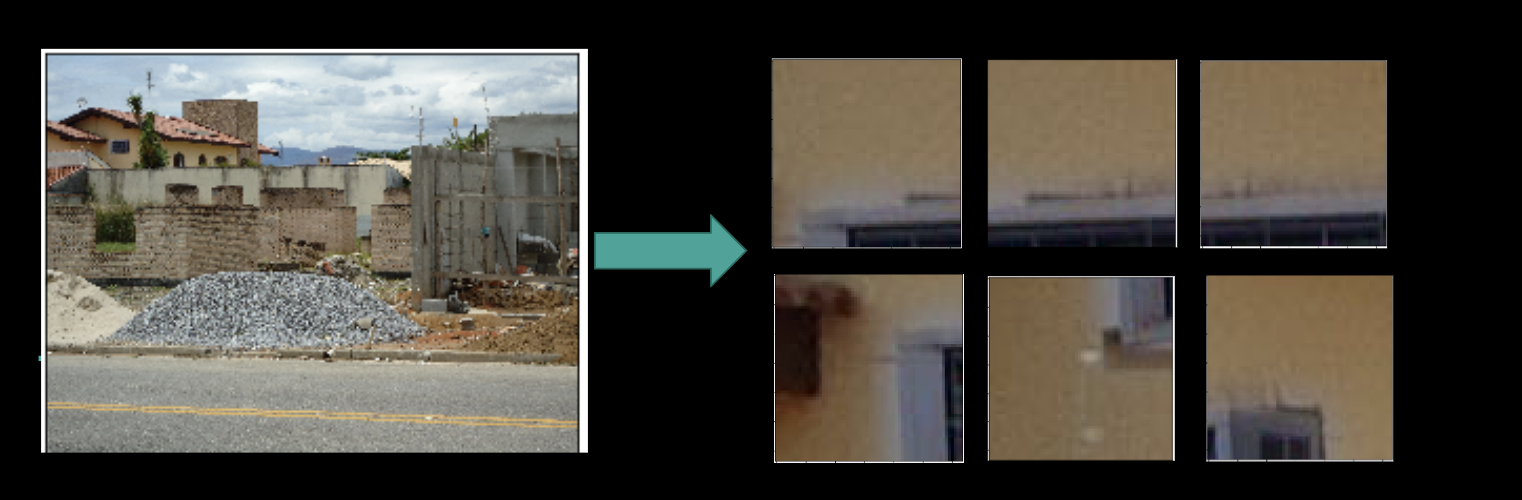

In [87]:
from IPython.display import Image,display
display(Image(r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\Images\f2.png',width=900, height=300))

# Model Evaluation

## CNN

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 517ms/step
Precision score: 0.25
Recall score: 0.5
F1 score: 0.3333333333333333
[[  0 302]
 [  0 302]]
Plot of Confusion Matrix


c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


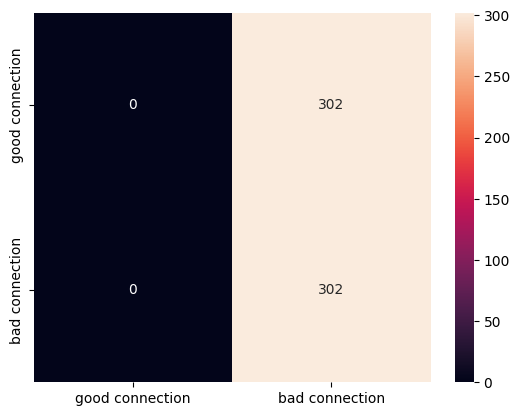

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.50      1.00      0.67       302

    accuracy                           0.50       604
   macro avg       0.25      0.50      0.33       604
weighted avg       0.25      0.50      0.33       604



c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [91]:
y_pred_prob = cnn_model.predict(test_set)
y_pred_cnn = (y_pred_prob > 0.5).astype("int32")

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
# plot_confusion_matrix(cm,['good connection','bad connection'])
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['good connection','bad connection'],
            yticklabels=['good connection','bad connection'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(y_pred, y_true):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

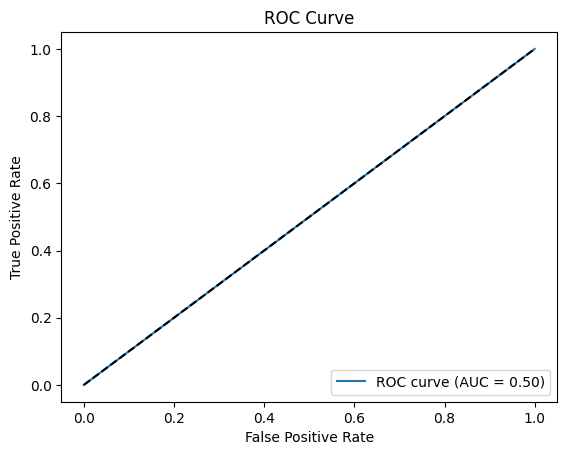

In [94]:
plot_roc(y_pred_cnn,y_cv)

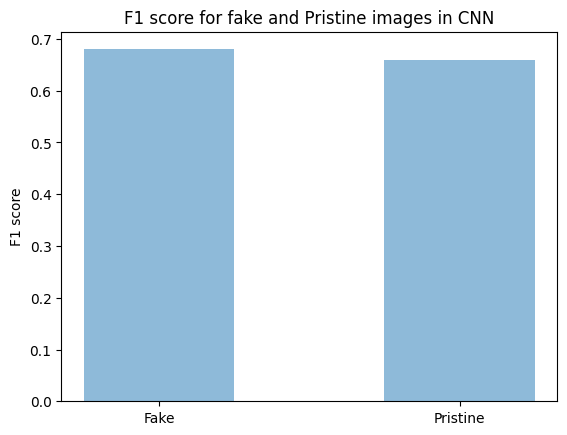

In [95]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Fake', 'Pristine')
y_pos = np.arange(len(objects))
performance = [0.68,0.66]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score for fake and Pristine images in CNN')
 
plt.show()

## Transfer Learning

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 521ms/step
Precision score: 0.6191500238944643
Recall score: 0.6175496688741722
F1 score: 0.6162611285757897
[[204  98]
 [133 169]]
Plot of Confusion Matrix


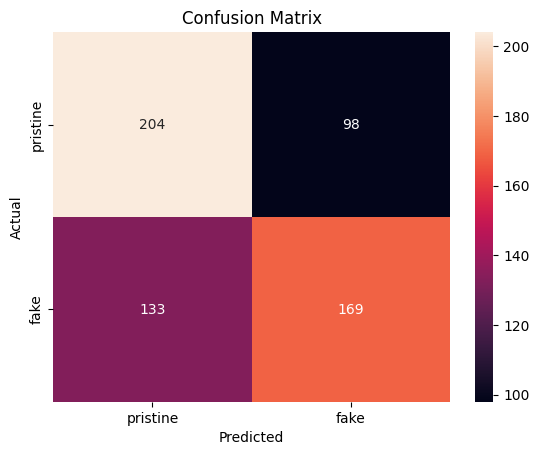

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       302
           1       0.63      0.56      0.59       302

    accuracy                           0.62       604
   macro avg       0.62      0.62      0.62       604
weighted avg       0.62      0.62      0.62       604



In [99]:
y_pred_prob = transfer_model.predict(test_set)
y_pred_cnn = (y_pred_prob > 0.5).astype("int32").flatten()

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
# plot_confusion_matrix(cm,['pristine','fake'])
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['pristine','fake'],
            yticklabels=['pristine','fake'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_cv,y_pred_cnn))

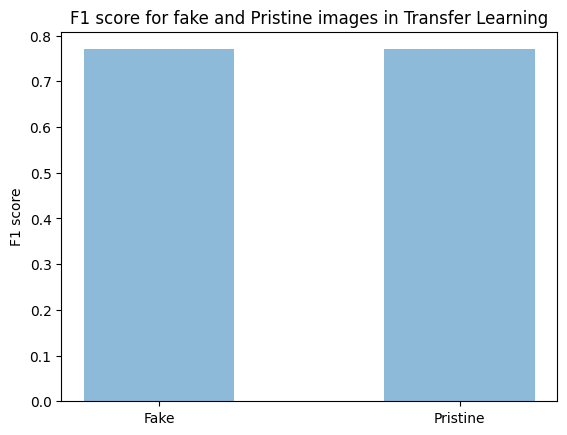

In [100]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Fake', 'Pristine')
y_pos = np.arange(len(objects))
performance = [0.77,0.77]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score for fake and Pristine images in Transfer Learning')
 
plt.show()

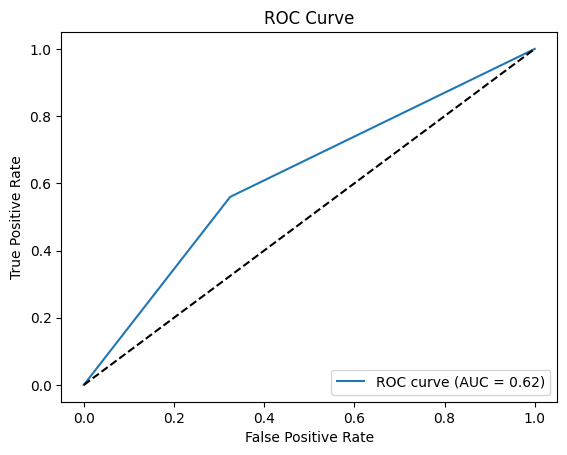

In [101]:
plot_roc(y_pred_cnn,y_cv)

#Model Comparison

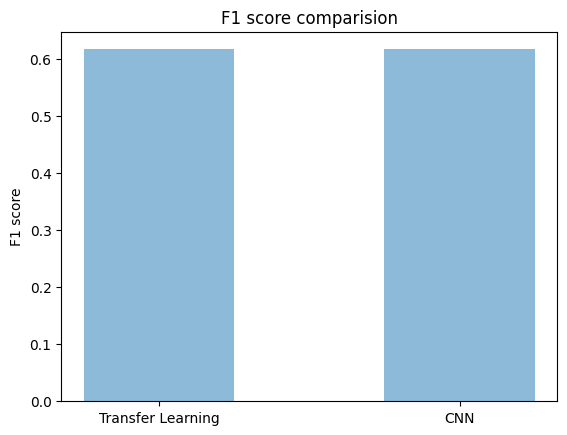

In [102]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Transfer Learning', 'CNN')
y_pos = np.arange(len(objects))
performance = [score_lr1,score_lr2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score comparision')
 
plt.show()

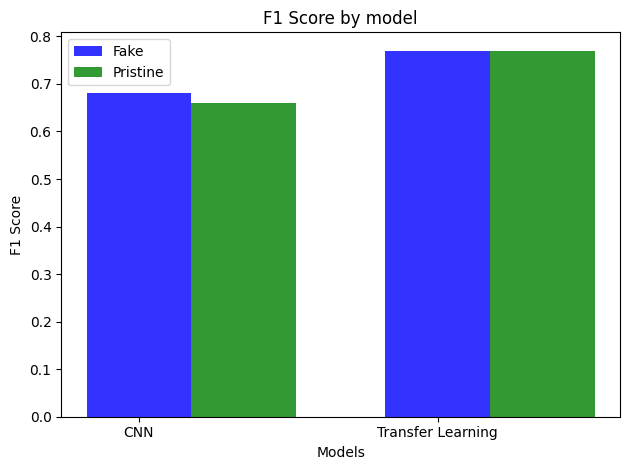

In [103]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.68,0.77 )
p = (0.66, 0.77)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Fake')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='Pristine')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score by model')
plt.xticks(index, ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

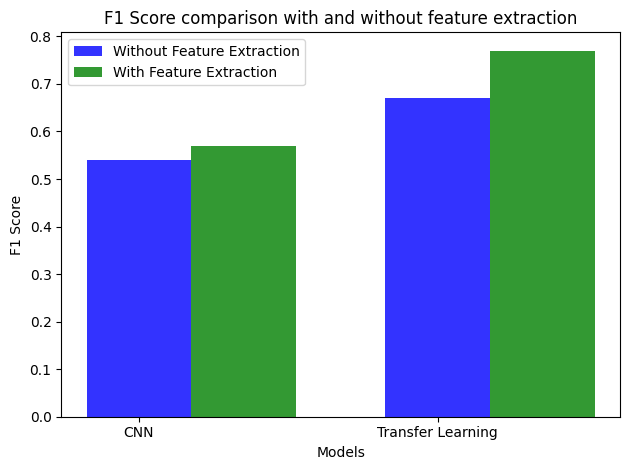

In [104]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.5395,0.67)
p = (0.5692, 0.77)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Without Feature Extraction')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='With Feature Extraction')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score comparison with and without feature extraction')
plt.xticks(index, ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

#Test 3 new images
* Labels : 1 - pristine and 0 - fake


Image 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


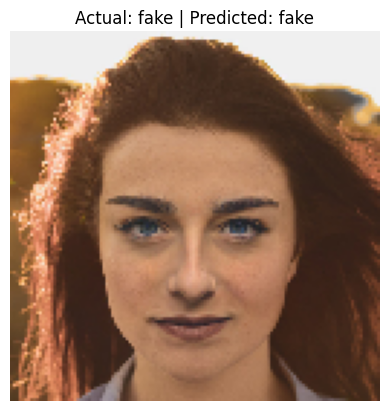

In [ ]:
#correct Actual 0, predicted 0

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\fake\mid_198_1111.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

label_name = "pristine" if pred_label == 1 else "fake"

plt.imshow(img)
plt.axis("off")
plt.title(f"Actual: fake | Predicted: {label_name}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


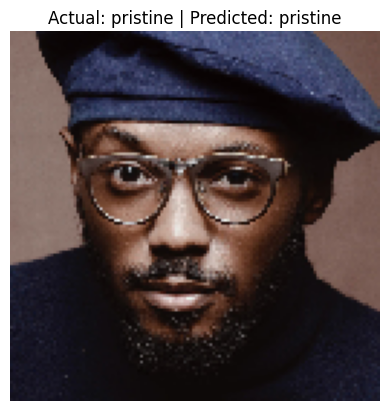

In [109]:
#correct 

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\real\real_00789.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

label_name = "pristine" if pred_label == 1 else "fake"

plt.imshow(img)
plt.axis("off")
plt.title(f"Actual: pristine | Predicted: {label_name}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


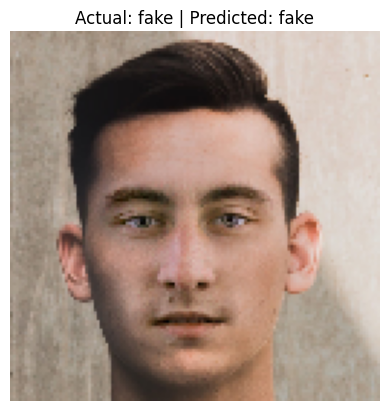

In [113]:
#correct 

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = r'C:\Users\gaura\OneDrive\Documents\capstone1\Sourcecode\dataset\test\fake\mid_193_1111.jpg'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

prediction = transfer_model.predict(img_input)[0][0]
pred_label = 1 if prediction > 0.5 else 0

label_name = "pristine" if pred_label == 1 else "fake"

plt.imshow(img)
plt.axis("off")
plt.title(f"Actual: fake | Predicted: {label_name}")
plt.show()

Here 3 of 3 predictions are right

— Gaurav Kumar
Deep Learning | Computer Vision